In [2]:
import numpy as np
import irreducible_library as irr
import os, sys
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
%matplotlib inline
%load_ext autoreload
plt.style.use('default')
from matplotlib import rc, rcParams
# Make use of TeX\ufeff
#rc('text',usetex=True)
# Change all fonts to ‘Computer Modern’
rc('font',**{'size':14, 'family':'serif','serif':['Times New Roman']})

/Users/ellailes/anaconda3/envs/power-spectra/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/ellailes/anaconda3/envs/power-spectra/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)
/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:78: RuntimeWarning: overflow encountered in exp
  2*T/(3*np.pi**2)*np.sqrt((y*T)**2-me**2)**3/(np.exp(y-ue(T)/T)+1), me/T, np.inf)
/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:87: RuntimeWarning: overflow encountered in exp
  2*T/np.pi**2*(y*T)**2 * np.sqrt((y*T)**2-me**2)/(np.exp(y-ue(T)/T)+1), me/T, np.inf)
/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:78: RuntimeWarning: invalid value encountered in sqrt
  2*T/(3*np

In [5]:
# 0.3 eV in MeV is 0.3 * 10 ^ -6 MeV 
# In powers of ten this is equal to log(0.3*10^-6) = - 6.5
Tlist = np.logspace(1,-3,num=1000)
h = 0.67
Omegab = 0.05
eta = 5.5 * 10**(-10)*h**2*Omegab/0.02
BH = 13.6 * 10 ** (-6)
me = 0.511
RZetaThree = 1.202056903

## Baryon and Electron Number Densities

In [3]:
def nb(T):
    return eta * 2 * RZetaThree * T**3

In [6]:
Tlist = np.logspace(2.5,-6.5,num=1000)
def n_e_Full(T):
    return fsolve(lambda ne:\
    (ne/nb(T) - 1 + (ne/(nb(T)*np.pi))**2 * eta * 2 * RZetaThree * (2 * np.pi * T / me)**(3/2) * np.exp(BH/T)), nb(T))

n_elist = np.array([n_e_Full(i)[0] for i in Tlist])
ne_total = interp1d(Tlist, n_elist)

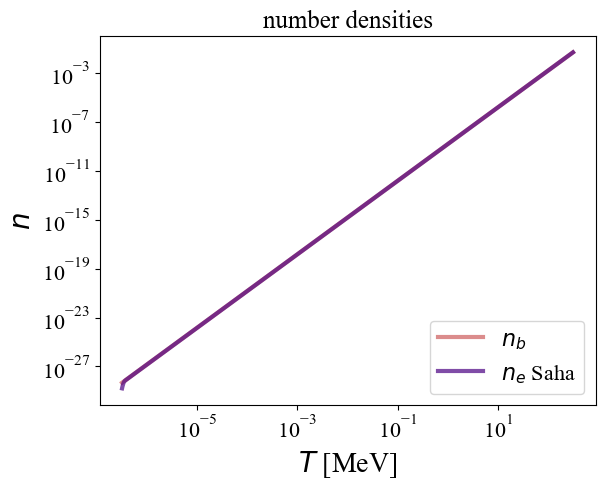

In [7]:
f, ax = plt.subplots()

ax.loglog(Tlist, [nb(i) for i in Tlist],lw=3,c='indianred',alpha = 0.7,label = '$n_b$')
ax.loglog(Tlist, [ne_total(i) for i in Tlist],lw=3,c='indigo',alpha = 0.7,label = '$n_e$ Saha')

ax.set_ylabel(r'$n$', fontsize=20)
ax.set_xlabel(r'$T$ [MeV]', fontsize=20)
ax.set_title(r'number densities', fontsize=18)
#ax.set_xlim([20,0.1])
#ax.set_ylim([0.0006, 1.5])
#ax.set_xticklabels(xticklabels,fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

ax.legend(loc='lower right',fontsize=16)

## Chemical Potential

### Smoothing and Creating chemical potential from literature

In [8]:

def load_csv(file_path):
    """
    Load a CSV file into a numpy array.

    Parameters:
        file_path (str): The path to the CSV file.

    Returns:
        numpy.ndarray: The numpy array containing the data.
    """
    try:
        data = np.genfromtxt(file_path, delimiter=',', skip_header=1)
        return data
    except Exception as e:
        print("Error loading CSV file:", e)
        return None

8.660918833880416 6.143152352669581e-10


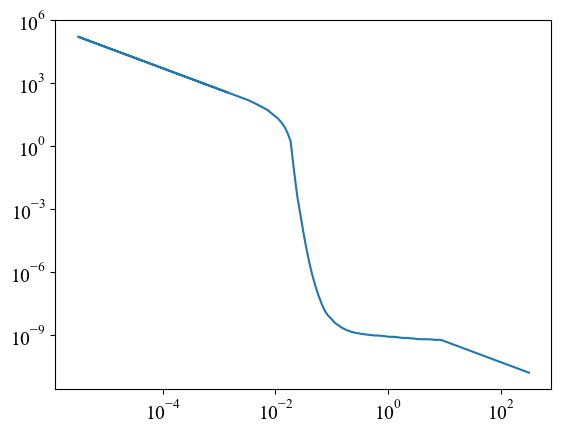

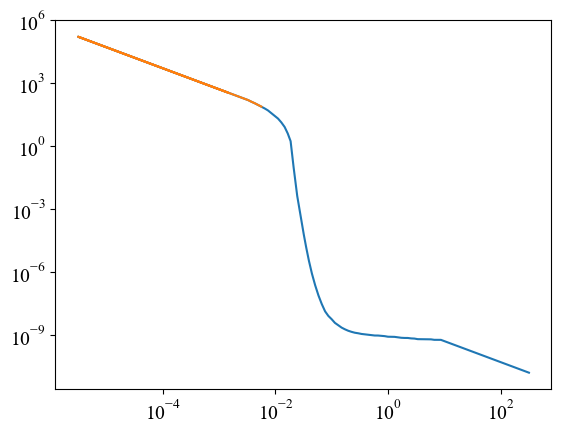

In [113]:
file_path = "e-mu_raw.csv"
array_data = load_csv(file_path)
array_data = array_data[array_data[:,0].argsort()]
#print(array_data[-1])
x = np.empty(len(array_data))
y = np.empty(len(array_data))

for i in range(len(array_data)):
    x[i]=array_data[i][0]
    y[i]=array_data[i][1]
print(x[-1],y[-1])
T1 = np.logspace(np.log10(8.67),2.5,num = 50)
ylow = np.empty(50)
for i in range(len(ylow)):
    ylow[i] = 6.158546982967794e-10*(8.67/T1[i])

T2 = np.logspace(np.log10(0.0014),-5.5,num = 200)
yhigh = np.empty(200)
for i in range(len(yhigh)):
    yhigh[i] = me/T2[i]+(0.5130043512324196-me)/(0.0032897046977761724)
finalx = np.empty(50 + 200 + len(x) - 7)
finaly = np.empty(50 + 200 + len(x) - 7)
finalx[:200] = T2
finaly[:200] = yhigh
finalx[200:len(x)+200-7] = x[7:]
finaly[200:len(x)+200-7] = y[7:]
finalx[len(x)+200-7:] = T1
finaly[len(x)+200-7:] = ylow

finaly = scipy.signal.savgol_filter(finaly,3,2)
plt.loglog(finalx,finaly)
plt.show()
interp = interp1d(finalx, finaly, kind = 'quadratic')


ynew1 = np.array([interp(i) for i in finalx])
ynew = scipy.signal.savgol_filter(ynew1,3,2)

interp = interp1d(finalx, ynew,kind ='quadratic')
ynew1 = np.array([interp(i) for i in finalx])
ynewnew = scipy.signal.savgol_filter(ynew1,3,2)
ynewnew = scipy.signal.savgol_filter(ynewnew,3,2)
ynewnew = scipy.signal.savgol_filter(ynewnew,3,2)
ynewnew = scipy.signal.savgol_filter(ynewnew,3,2)
ynewnew = scipy.signal.savgol_filter(ynewnew,3,2)
ynewnew = scipy.signal.savgol_filter(ynewnew,3,2)
plt.loglog(finalx,ynewnew)
plt.loglog(finalx[:205],ynewnew[:205])
plt.show()

In [114]:
file_path = 'e-mu_filtered.csv'

# Save the array to a CSV file
np.savetxt(file_path,np.array([finalx,ynewnew]), delimiter=',')


### My Chemical Potential Expression

In [265]:
def mu_e(T):
    if T <= (0.0018):
        muD = 0.0018*np.arcsinh(eta*RZetaThree/np.pi**2*0.0018**(3/2)*(2*np.pi/me)**(3/2)*np.exp(me/0.0018))
        return me+(muD-me)*(T/0.0018)
    if T > 10**1:
        return 0
    return T*np.arcsinh(eta*RZetaThree/np.pi**2*T**(3/2)*(2*np.pi/me)**(3/2)*np.exp(me/T))

file_path = "e-mu_filtered.csv"
array_data = np.genfromtxt(file_path, delimiter=',')

x = array_data[0]
y = array_data[1]*array_data[0]
mu_e_lit = interp1d(x, y,kind = 'quadratic')


Tlist = np.logspace(2.5, -5.5, num=10000)
ufull_list = np.array([mu_e(i) for i in Tlist])
u_e = interp1d(Tlist, ufull_list)

print(u_e(0.0018))


0.45999955418682403


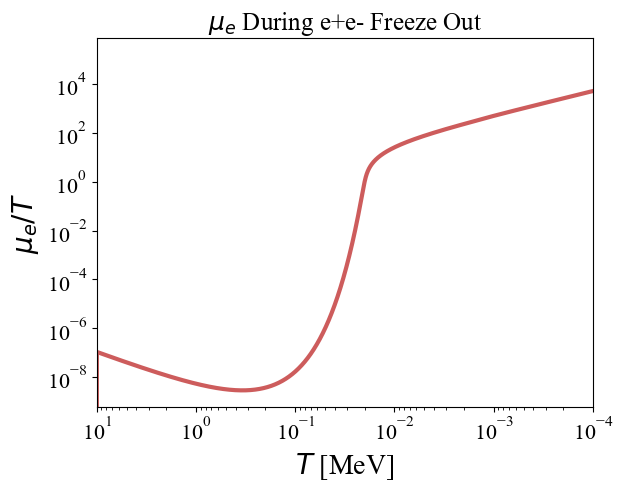

In [261]:
f, ax = plt.subplots()

ax.loglog(Tlist,np.array([u_e(i)/i for i in Tlist]),lw=3,c='indianred',alpha = 1,label = '$mine$')
#ax.loglog(Tlist,np.array([mu_e_lit(i)/i for i in Tlist]),lw=3,c='indigo',alpha = 1,label = '$literature$')

ax.set_ylabel(r'$\mu_e/T$', fontsize=20)
ax.set_xlabel(r'$T$ [MeV]', fontsize=20)
ax.set_title(r'$\mu_e$ During e+e- Freeze Out', fontsize=18)
ax.set_xlim([10,0.0001])
#ax.set_ylim([0.0006, 1.5])
#ax.set_xticklabels(xticklabels,fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

#ax.legend(loc='lower right',fontsize=16)

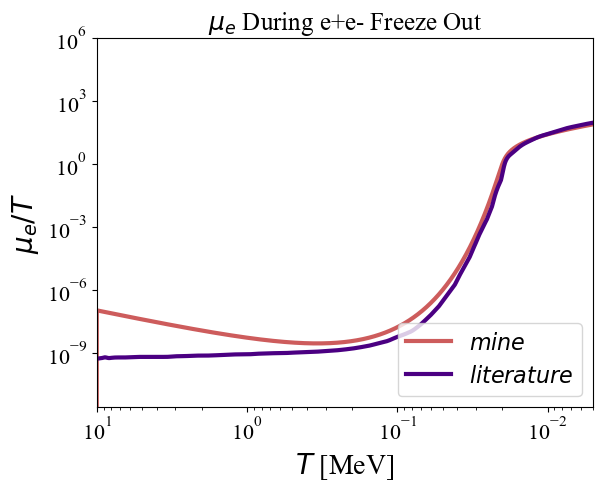

In [181]:
f, ax = plt.subplots()

ax.loglog(Tlist,np.array([u_e(i)/i for i in Tlist]),lw=3,c='indianred',alpha = 1,label = '$mine$')
ax.loglog(Tlist,np.array([mu_e_lit(i)/i for i in Tlist]),lw=3,c='indigo',alpha = 1,label = '$literature$')

ax.set_ylabel(r'$\mu_e/T$', fontsize=20)
ax.set_xlabel(r'$T$ [MeV]', fontsize=20)
ax.set_title(r'$\mu_e$ During e+e- Freeze Out', fontsize=18)
ax.set_xlim([10,0.005])
#ax.set_ylim([0.0006, 1.5])
#ax.set_xticklabels(xticklabels,fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

ax.legend(loc='lower right',fontsize=16)

## Testing

In [267]:
def n_e(T):
    """
    number density of electrons
    """
    integral= scipy.integrate.quad(lambda y: \
    1/np.pi**2*(y*T)*T * np.sqrt((y*T)**2-me**2)*(1+np.tanh((u_e(T)/(2*T)-y/2))), me/T, np.inf)
    return integral[0]

def n_e_lit(T):
    """
    number density of electrons
    """
    integral= scipy.integrate.quad(lambda y: \
    (1/np.pi**2)*y*T**2*np.sqrt((y*T)**2-me**2)*(1+np.tanh((mu_e_lit(T)/(2*T)-y/2))), me/T, np.inf)
    return integral[0]

def n_e1(T):
    """
    number density of electrons
    """
    integral= scipy.integrate.quad(lambda y: \
    (1/np.pi**2)*y*T**2*np.sqrt((y*T)**2-me**2)*(1+np.tanh((u_e(T)/(2*T)-y/2))), me/T, np.inf)
    return integral[0]

def p_e(T):
    """
    pressure density of electron
    """
    integral= scipy.integrate.quad(lambda y: \
    T/(3*np.pi**2)*np.sqrt((y*T)**2-me**2)**3*(1+np.tanh((u_e(T)/(2*T)-y/2))), me/T, np.inf)
    return integral[0]

def rho_e(T):
    """
    energy density of electrons
    """

    integral= scipy.integrate.quad(lambda y: \
    T/np.pi**2*(y*T)**2 * np.sqrt((y*T)**2-me**2)*(1+np.tanh((u_e(T)/(2*T)-y/2))), me/T, np.inf)
    return integral[0]

def s_e(T):
    """
    entropy density of electron
    """
    return (p_e(T)+rho_e(T))/T

(10, 0.0001)

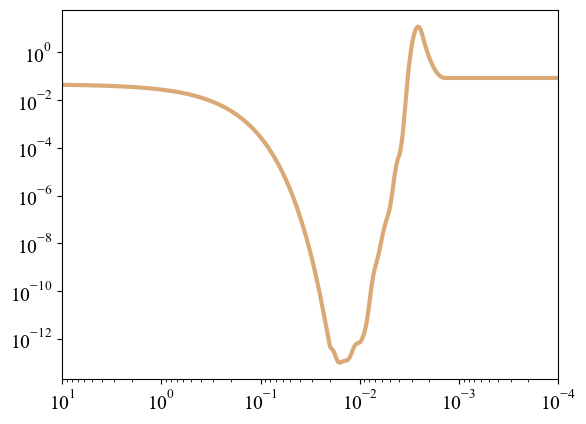

In [133]:
def ne_classical(T):
    return 2*(me*T/(2*np.pi))**(3/2)*np.exp(-(me-mu_e_lit(T))/T)

Tlist = np.logspace(1,-4,num=1000)

plt.loglog(Tlist, [ne_classical(i)/i**(3/2) for i in Tlist],lw=3,c='peru',alpha = 0.7,label = '$n_e a^3$')
plt.xlim([10,0.0001])

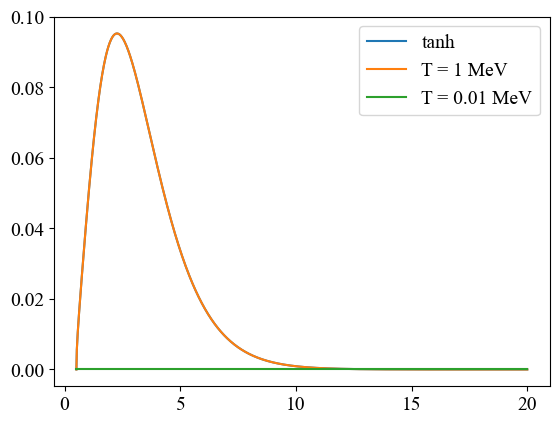

In [112]:
def integrand(E,T):
    return (2/np.pi**2)*E*np.sqrt(E**2-me**2)/(np.exp((E-u_e(T))/T)+1)

def integrandtanh(E,T):
    return (1/np.pi**2)*E*np.sqrt(E**2-me**2)*(1+np.tanh((u_e(T)-E)/(2*T)))

Elist = np.linspace(me,20, num = 1000)

plt.plot(Elist, np.array([integrandtanh(i,1) for i in Elist]),label = "tanh")
plt.plot(Elist, np.array([integrand(i,1) for i in Elist]), label = "T = 1 MeV")
#plt.plot(Elist, np.array([integrand(i,0.1) for i in Elist]),label = "T = 0.1 MeV")
plt.plot(Elist, np.array([integrandtanh(i,0.001) for i in Elist]),label = "T = 0.01 MeV")

plt.legend()


In [259]:
print(np.log10(mu_e(0.02)/mu_e(0.002))/np.log10(0.02/0.002))

-1.3655407355764813


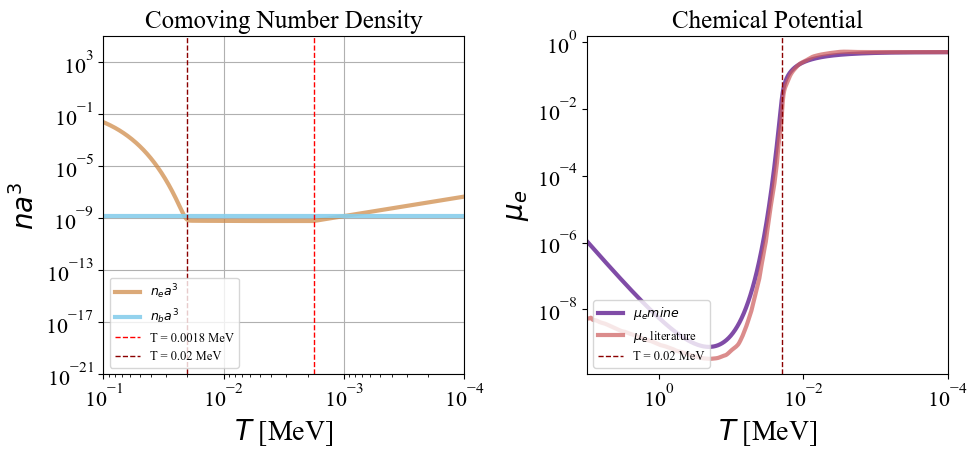

In [268]:
Tlist = np.logspace(1,-4,num=1000)
f, ax = plt.subplots(1,2)
f.set_figwidth(10)

ax[0].loglog(Tlist, [n_e1(i)/i**3 for i in Tlist],lw=3,c='peru',alpha = 0.7,label = '$n_e a^3$')
#ax[0].loglog(Tlist, [n_e_lit(i)/i**3 for i in Tlist],lw=3,c='hotpink',alpha = 0.7,label = r'$n_e a^3 lit$')
ax[0].loglog(Tlist, [nb(i)/i**3 for i in Tlist],lw=3,c='skyblue',alpha = 0.9, label = '$n_b a^3$')
ax[1].loglog(Tlist, [mu_e(i) for i in Tlist],lw=3,c='indigo',alpha = 0.7,label = '$\mu_e mine$')
ax[1].loglog(Tlist, [mu_e_lit(i) for i in Tlist],lw=3,c='indianred',alpha = 0.7,label = '$\mu_e$ literature')
#ax[0][0].loglog(Tlist, [irr.rho_e(i) for i in Tlist],lw=3,c='tomato',alpha = 0.7,label = 'without $\mu_e$')
ax[0].axvline(x=0.001775, color='red', linestyle='--', linewidth=1, label = "T = 0.0018 MeV")
ax[0].axvline(x=0.02, color='darkred', linestyle='--', linewidth=1, label = "T = 0.02 MeV")

ax[0].set_ylabel(r'$n a^3$', fontsize=20)
ax[0].set_xlabel(r'$T$ [MeV]', fontsize=20)
ax[0].set_title(r'Comoving Number Density', fontsize=18)
ax[0].xaxis.set_tick_params(labelsize=16)
ax[0].yaxis.set_tick_params(labelsize=16)
ax[0].set_xlim([0.1,0.0001])
ax[0].set_ylim([0.000000000000000000001,100000])

ax[1].set_ylabel(r'$\mu_e$', fontsize=20)
ax[1].set_xlabel(r'$T$ [MeV]', fontsize=20)
#ax[1].set_xlim([0.05,0.03])
ax[1].set_xlim([10,0.0001])
#ax[1].axvline(x=0.04, color='k', linestyle='--', linewidth=0.8, label = "T = 0.001775 MeV")
#ax[1].axvline(x=0.001775, color='k', linestyle='--', linewidth=0.8, label = "T = 0.001775 MeV")
ax[1].axvline(x=0.02, color='darkred', linestyle='--', linewidth=1, label = "T = 0.02 MeV")
ax[1].set_title(r'Chemical Potential', fontsize=18)
ax[1].xaxis.set_tick_params(labelsize=16)
ax[1].yaxis.set_tick_params(labelsize=16)
ax[0].legend(loc='lower left',fontsize=9)
ax[1].legend(loc='lower left',fontsize=9)
ax[0].grid()
f.tight_layout()




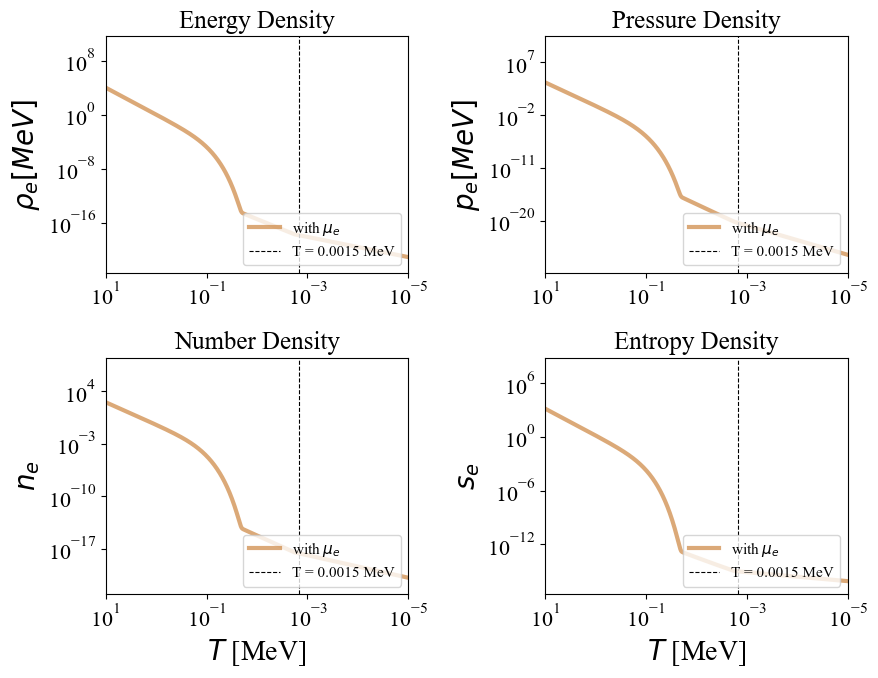

In [270]:
Tlist = np.logspace(2.5,-5.5,num=1000)
f, ax = plt.subplots(2,2)
f.set_figwidth(9)
f.set_figheight(7)

ax[0][0].loglog(Tlist, [rho_e(i) for i in Tlist],lw=3,c='peru',alpha = 0.7,label = 'with $\mu_e$')
#ax[0][0].loglog(Tlist, [irr.rho_e(i) for i in Tlist],lw=3,c='tomato',alpha = 0.7,label = 'without $\mu_e$')
ax[0][0].axvline(x=0.0015, color='k', linestyle='--', linewidth=0.8, label = "T = 0.0015 MeV")

ax[0][0].set_ylabel(r'$\rho_e [MeV]$', fontsize=20)
#ax[0][0].set_xlabel(r'$T$ [MeV]', fontsize=20)
ax[0][0].set_title(r'Energy Density', fontsize=18)
ax[0][0].xaxis.set_tick_params(labelsize=16)
ax[0][0].yaxis.set_tick_params(labelsize=16)
ax[0][0].set_xlim([10,0.00001])

ax[0][0].legend(loc='lower right',fontsize=11)

ax[1][0].loglog(Tlist, [n_e(i) for i in Tlist],lw=3,c='peru',alpha = 0.7,label = 'with $\mu_e$')
#ax[1][0].loglog(Tlist, [irr.n_e(i) for i in Tlist],lw=3,c='tomato',alpha = 0.7,label = 'without $\mu_e$')
ax[1][0].set_ylabel(r'$n_e$', fontsize=20)
ax[1][0].set_xlabel(r'$T$ [MeV]', fontsize=20)
ax[1][0].axvline(x=0.0015, color='k', linestyle='--', linewidth=0.8, label = "T = 0.0015 MeV")
ax[1][0].set_title(r'Number Density', fontsize=18)
ax[1][0].xaxis.set_tick_params(labelsize=16)
ax[1][0].yaxis.set_tick_params(labelsize=16)
ax[1][0].set_xlim([10,0.00001])

ax[1][0].legend(loc='lower right',fontsize=11)


ax[0][1].loglog(Tlist, [p_e(i) for i in Tlist],lw=3,c='peru',alpha = 0.7,label = 'with $\mu_e$')
#ax[0][1].loglog(Tlist, [irr.p_e(i) for i in Tlist],lw=3,c='tomato',alpha = 0.7,label = 'without $\mu_e$')
ax[0][1].set_ylabel(r'$p_e [MeV]$', fontsize=20)
#ax[0][1].set_xlabel(r'$T$ [MeV]', fontsize=20)
ax[0][1].axvline(x=0.0015, color='k', linestyle='--', linewidth=0.8, label = "T = 0.0015 MeV")
ax[0][1].set_title(r'Pressure Density', fontsize=18)
ax[0][1].xaxis.set_tick_params(labelsize=16)
ax[0][1].yaxis.set_tick_params(labelsize=16)
ax[0][1].set_xlim([10,0.00001])
ax[0][1].legend(loc='lower right',fontsize=11)

ax[1][1].loglog(Tlist, [s_e(i) for i in Tlist],lw=3,c='peru',alpha = 0.7,label = 'with $\mu_e$')
#ax[1][1].loglog(Tlist, [irr.s_e(i) for i in Tlist],lw=3,c='tomato',alpha = 0.7,label = 'without $\mu_e$')
ax[1][1].axvline(x=0.0015, color='k', linestyle='--', linewidth=0.8, label = "T = 0.0015 MeV")
ax[1][1].set_ylabel(r'$s_e$', fontsize=20)
ax[1][1].set_xlabel(r'$T$ [MeV]', fontsize=20)
ax[1][1].set_title(r'Entropy Density', fontsize=18)
ax[1][1].xaxis.set_tick_params(labelsize=16)
ax[1][1].yaxis.set_tick_params(labelsize=16)
ax[1][1].set_xlim([10,0.00001])
ax[1][1].legend(loc='lower right',fontsize=11)
plt.tight_layout()
plt.show()